In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Dropout 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Завантаження даних 
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0}) 

In [4]:
max_words = 10000 
# Максимальна кількість слів 
max_len = 100 
# Максимальна довжина послідовності 
tokenizer = Tokenizer(num_words=max_words, lower=True) 
tokenizer.fit_on_texts(df['review']) 
sequences = tokenizer.texts_to_sequences(df['review']) 
x = pad_sequences (sequences, maxlen=max_len) 
y = df['sentiment'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [6]:
model_rnn = Sequential([ 
Embedding(max_words, 128), 
SimpleRNN(128, activation='tanh'), 
Dropout(0.5), 
Dense (1, activation='sigmoid') 
]) 
model_rnn.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics = ['accuracy']) 
history_rnn = model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2)])

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.5405 - loss: 0.7083 - val_accuracy: 0.7830 - val_loss: 0.4729
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.7624 - loss: 0.5035 - val_accuracy: 0.8019 - val_loss: 0.4607
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.7743 - loss: 0.4802 - val_accuracy: 0.6779 - val_loss: 0.5896
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.7807 - loss: 0.4748 - val_accuracy: 0.8077 - val_loss: 0.4499
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.8524 - loss: 0.3691 - val_accuracy: 0.7748 - val_loss: 0.5005
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.7655 - loss: 0.4889 - val_accuracy: 0.6334 - val_loss: 0.6361


In [7]:
model_lstm = Sequential([ 
Embedding(max_words, 128), 
LSTM(128, return_sequences=True), 
LSTM(64), 
Dropout(0.5), 
Dense (1, activation='sigmoid') 
])
model_lstm.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics = ['accuracy']) 
history_lstm = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2)])

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 193s 152ms/step - accuracy: 0.7722 - loss: 0.4668 - val_accuracy: 0.8578 - val_loss: 0.3215
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 190s 152ms/step - accuracy: 0.8992 - loss: 0.2538 - val_accuracy: 0.8692 - val_loss: 0.3110
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 183s 147ms/step - accuracy: 0.9321 - loss: 0.1779 - val_accuracy: 0.8563 - val_loss: 0.3566
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 180s 144ms/step - accuracy: 0.9530 - loss: 0.1315 - val_accuracy: 0.8640 - val_loss: 0.3651


In [8]:
model_bilstm = Sequential([
Embedding(max_words, 128), 
Bidirectional(LSTM(128, return_sequences=True)), 
Bidirectional(LSTM(64)), 
Dropout(0.3), 
Dense(1, activation='sigmoid') 
])
model_bilstm.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics = ['accuracy']) 
history_bilstm = model_bilstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2)])

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 310s 243ms/step - accuracy: 0.7738 - loss: 0.4566 - val_accuracy: 0.8610 - val_loss: 0.3162
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 310s 248ms/step - accuracy: 0.9009 - loss: 0.2459 - val_accuracy: 0.8760 - val_loss: 0.2944
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 306s 245ms/step - accuracy: 0.9396 - loss: 0.1619 - val_accuracy: 0.8620 - val_loss: 0.3204
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 306s 245ms/step - accuracy: 0.9643 - loss: 0.1030 - val_accuracy: 0.8620 - val_loss: 0.3917


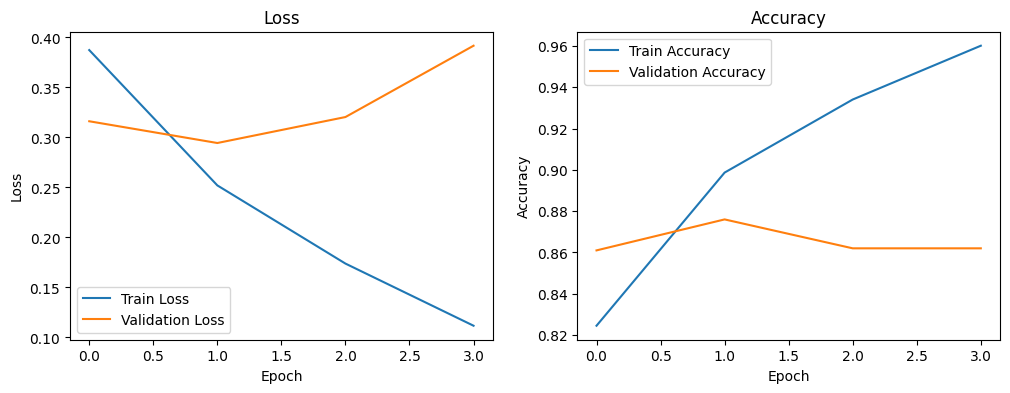

In [9]:
# Побудова графіків 
def plot_history(history, title): 
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1) 
    plt.plot(history.history[ 'loss'], label='Train Loss') 
    plt.plot(history.history['val_loss'], label='Validation Loss') 
    plt.xlabel('Epoch') 
    plt.ylabel('Loss') 
    plt.legend() 
    plt.title('Loss')
    plt.subplot(1, 2, 2) 
    plt.plot(history.history['accuracy'], label='Train Accuracy') 
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
    plt.xlabel('Epoch') 
    plt.ylabel('Accuracy') 
    plt.legend() 
    plt.title('Accuracy') 
    plt.show() 

plot_history(history_bilstm, "Bidirectional LSTM")

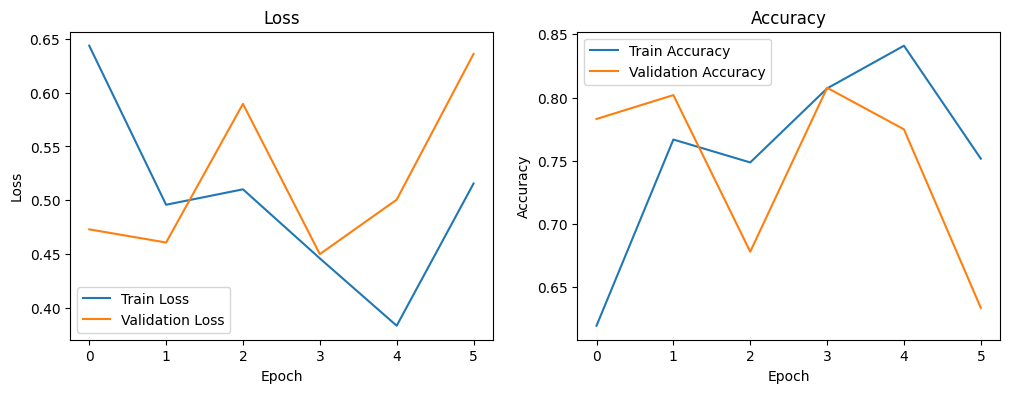

In [10]:
plot_history(history_rnn, "SimpleRNN")

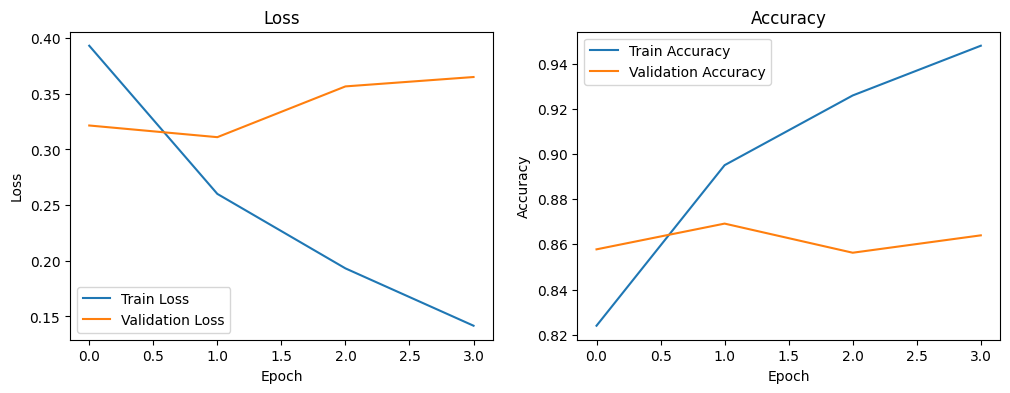

In [11]:
plot_history(history_lstm, "LSTM")

In [12]:
y_pred_lstm = model_bilstm.predict(X_test) 
y_pred_classes_lstm = (y_pred_lstm > 0.5).astype("int32") 
sentiment_mapping = {0: 'negative', 1: 'positive'} 
y_pred_sentiment_lstm = [sentiment_mapping[i[0]] for i in y_pred_classes_lstm]
output = [] 
for i in range(10): 
    review_text= df.iloc[i]['review']
    true_sentiment = 'positive' if df.iloc[i]['sentiment'] == 1 else 'negative'
    predicted_sentiment = y_pred_sentiment_lstm[i] 
    output.append([review_text, true_sentiment, predicted_sentiment]) 
output_df = pd.DataFrame (output, columns=['Review', 'True Sentiment', 'Predicted Sentiment']) 
output_df

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step


,Review,True Sentiment,Predicted Sentiment
0,One of the other reviewers has mentioned that ...,positive,positive
1,A wonderful little production. <br /><br />The...,positive,positive
2,I thought this was a wonderful way to spend ti...,positive,negative
3,Basically there's a family where a little boy ...,negative,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,negative
5,"Probably my all-time favorite movie, a story o...",positive,positive
6,I sure would like to see a resurrection of a u...,positive,positive
7,"This show was an amazing, fresh & innovative i...",negative,negative
8,Encouraged by the positive comments about this...,negative,negative
9,If you like original gut wrenching laughter yo...,positive,negative


**Висновок**:
У ході виконання завдань було розроблено та протестовано кілька архітектур рекурентних нейронних мереж для прогнозування тексту та аналізу сентименту. Для генерації тексту використовувалася LSTM-модель, параметри якої оптимізувалися за допомогою Keras Tuner. 
Для задачі аналізу сентименту було побудовано три різні архітектури: SimpleRNN, LSTM та Bidirectional LSTM. Вони були натреновані із застосуванням ранньої зупинки для запобігання перенавчанню. Результати показали, що найкраще працює Bidirectional LSTM, демонструючи вищу точність порівняно з іншими підходами. Було також візуалізовано графіки функції втрат і точності для кожної моделі. 
На завершення проведено тестування моделі на реальних рецензіях, і для 10 випадкових прикладів порівняно прогнозовані сентименти з фактичними.